In [1]:
import crowdtruth
from crowdtruth.configuration import DefaultConfig
from collections import Counter
import pandas as pd
import json

## Loading results exported from toloka

In [3]:
tsv_file1='phase2_results/final_result1.tsv' #pool1 data
csv_table1=pd.read_table(tsv_file1,sep='\t')
csv_table1 = csv_table1.drop(columns=['OUTPUT:others','INPUT:image_left','GOLDEN:result','HINT:text','HINT:default_language','GOLDEN:others'])

In [4]:
tsv_file2='phase2_results/final_result2.tsv' #pool2 data
csv_table2=pd.read_table(tsv_file2,sep='\t')
csv_table2 = csv_table2.drop(columns=['OUTPUT:others','INPUT:image_left','GOLDEN:result','HINT:text','HINT:default_language','GOLDEN:others'])

In [7]:
csv_table = pd.concat([csv_table1, csv_table2], ignore_index=True)

In [8]:
csv_table = csv_table[csv_table['INPUT:image_right'].notna()]
csv_table['OUTPUT:result'] =  csv_table['OUTPUT:result'].apply(lambda x: list(json.loads(x).keys()))

## Pre-processing the results

In [10]:
def process(x):
    if x is not None:
        x = list(map(lambda y: y.lower(), x))
    return x

In [11]:
csv_table['OUTPUT:result'] =  csv_table['OUTPUT:result'].apply(lambda x: process(x))
csv_table['OUTPUT:result'] =  csv_table['OUTPUT:result'].apply(lambda x: str(x).replace('[',''))
csv_table['OUTPUT:result'] =  csv_table['OUTPUT:result'].apply(lambda x: str(x).replace(']',''))
csv_table['OUTPUT:result'] =  csv_table['OUTPUT:result'].apply(lambda x: str(x).replace('\'',''))
csv_table['OUTPUT:result'] =  csv_table['OUTPUT:result'].apply(lambda x: str(x).replace(' ',''))
csv_table['ASSIGNMENT:started'] = pd.to_datetime(csv_table['ASSIGNMENT:started'])
csv_table['ASSIGNMENT:submitted'] = pd.to_datetime(csv_table['ASSIGNMENT:submitted'])

In [17]:
class TestConfig(DefaultConfig):
    inputColumns = ["INPUT:image_right"]
    outputColumns = ["OUTPUT:result"]
    customPlatformColumns = ["ASSIGNMENT:assignment_id", "ASSIGNMENT:task_suite_id", "ASSIGNMENT:worker_id", "ASSIGNMENT:started", "ASSIGNMENT:submitted"]
    open_ended_task = False
    annotation_vector = ['beak',
 'head',
 'iris',
 'pupil',
 'mantle',
 'lessercoverts',
 'scapulars',
 'coverts',
 'tertials',
 'rump',
 'primaries',
 'vent',
 'thigh',
 'tibio-tarsalarticulation',
 'tarsus',
 'feet',
 'tibia',
 'belly',
 'flanks',
 'breast',
 'throat',
 'wattle',
 'eyestripe'
,'others']

In [18]:
csv_table.to_csv('temp.csv',index=False)

## Loading into CrowdTruth Framework

In [21]:
data, config = crowdtruth.load(
    file = "temp.csv",
    config = TestConfig(),
    annotation_separator = ',' 
)

data['judgments'].head()

In [22]:
results = crowdtruth.run(data, config)

In [23]:
results["units"].head()

,duration,input.INPUT:image_right,job,output.OUTPUT:result,output.OUTPUT:result.annotations,output.OUTPUT:result.unique_annotations,worker,uqs,unit_annotation_score,uqs_initial,unit_annotation_score_initial
unit,,,,,,,,,,,
000179ad8d--60bc7d723c003231386e581a,8.55,/pilot/GilaWoodpecker/gila_woodpecker_batch_0_...,v2,"{'beak': 4, 'pupil': 1, 'scapulars': 2, 'terti...",46,22,20,0.239425,"{'beak': 0.4954289916617755, 'pupil': 0.217281...",0.082471,"{'beak': 0.2, 'pupil': 0.05, 'scapulars': 0.1,..."
000179ad8d--60bc7d723c003231386e581b,6.00,/pilot/GilaWoodpecker/gila_woodpecker_batch_1_...,v2,"{'rump': 3, 'tarsus': 3, 'beak': 3, 'head': 3,...",48,21,20,0.284344,"{'rump': 0.028158744560430025, 'tarsus': 0.107...",0.081028,"{'rump': 0.15, 'tarsus': 0.15, 'beak': 0.15, '..."
000179ad8d--60bc7d723c003231386e581c,6.35,/pilot/GilaWoodpecker/gila_woodpecker_batch_1_...,v2,"{'pupil': 3, 'scapulars': 3, 'beak': 4, 'head'...",43,21,20,0.243615,"{'pupil': 0.34823787829628067, 'scapulars': 0....",0.085893,"{'pupil': 0.15, 'scapulars': 0.15, 'beak': 0.2..."
000179ad8d--60bc7d723c003231386e581d,7.15,/pilot/GilaWoodpecker/gila_woodpecker_batch_1_...,v2,"{'head': 4, 'mantle': 4, 'rump': 5, 'breast': ...",41,18,20,0.491683,"{'head': 0.7841582106235858, 'mantle': 0.37317...",0.092875,"{'head': 0.2, 'mantle': 0.2, 'rump': 0.25, 'br..."
000179ad8d--60bc7d723c003231386e581e,6.45,/pilot/GilaWoodpecker/gila_woodpecker_batch_1_...,v2,"{'beak': 4, 'head': 4, 'mantle': 4, 'rump': 3,...",45,19,20,0.543366,"{'beak': 0.2949376007786904, 'head': 0.8366162...",0.077554,"{'beak': 0.2, 'head': 0.2, 'mantle': 0.2, 'rum..."


Text(0.5, 1.0, 'Image quality score distribution')

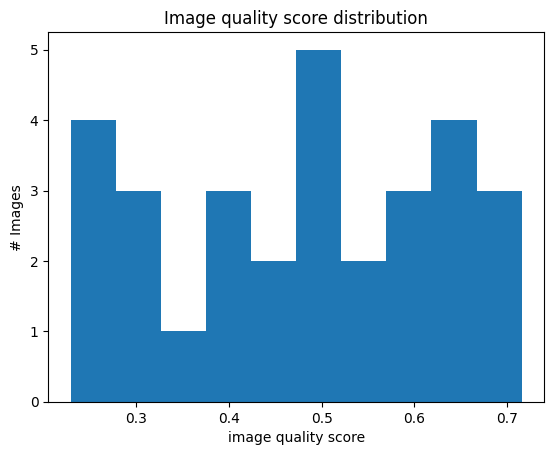

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['default'])
plt.hist(results["units"]["uqs"])
plt.xlabel("image quality score")
plt.ylabel("# Images")
plt.title('Image quality score distribution')

In [25]:
results["units"].sort_values(by=["uqs"])[["input.INPUT:image_right", "uqs", "unit_annotation_score"]].head()

,input.INPUT:image_right,uqs,unit_annotation_score
unit,,,
000179ad8d--60bc7d723c003231386e5823,/pilot/GilaWoodpecker/gila_woodpecker_batch_2_...,0.229340,"{'scapulars': 0.3329543101151954, 'primaries':..."
000179ad8d--60bc7d723c003231386e581a,/pilot/GilaWoodpecker/gila_woodpecker_batch_0_...,0.239425,"{'beak': 0.4954289916617755, 'pupil': 0.217281..."
000179ad8d--60bc7d723c003231386e581c,/pilot/GilaWoodpecker/gila_woodpecker_batch_1_...,0.243615,"{'pupil': 0.34823787829628067, 'scapulars': 0...."
000179ad8d--60bc7d723c003231386e5821,/pilot/GilaWoodpecker/gila_woodpecker_batch_2_...,0.276404,"{'vent': 0.32676208398892126, 'flanks': 0.2295..."
000179ad8d--60bc7d723c003231386e581b,/pilot/GilaWoodpecker/gila_woodpecker_batch_1_...,0.284344,"{'rump': 0.028158744560430025, 'tarsus': 0.107..."


In [26]:
results["units"]["uqs"].where(results["units"].uqs>=0.3).count()

23

In [27]:
results["units"]["uqs"].count()

30

In [28]:
results["annotations"]["output.OUTPUT:result"] = 0

for idx in results["judgments"].index:
    for k,v in results["judgments"]["output.OUTPUT:result"][idx].items():
        if v > 0:
            results["annotations"].loc[k, "output.OUTPUT:result"] += 1
    

results["annotations"] = results["annotations"].sort_values(by=["aqs"], ascending=False)
results["annotations"].round(3)[["output.OUTPUT:result", "aqs"]]

,output.OUTPUT:result,aqs
head,147,0.832
mantle,78,0.182
beak,123,0.170
pupil,72,0.150
iris,66,0.141
scapulars,80,0.137
primaries,53,0.125
coverts,75,0.124
lessercoverts,55,0.110
rump,76,0.097


Text(0.5, 1.0, 'Worker quality distribution')

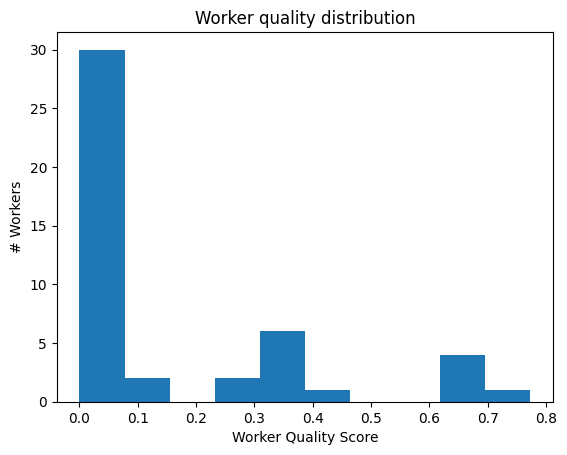

In [32]:
import matplotlib.pyplot as plt
plt.hist(results["workers"]["wqs"])
plt.xlabel("Worker Quality Score")
plt.ylabel("# Workers")
plt.title('Worker quality distribution')

## Least Unambigious images

In [91]:
results["units"].sort_values(by=["uqs"], ascending=False)[["input.INPUT:image_right", "unit_annotation_score","output.OUTPUT:result"]]['input.INPUT:image_right'][0]

'/pilot/HarlequinDuckMale/harlequin_duck_male_batch_4_9.png'

In [148]:
from collections import Counter
b = results["units"].sort_values(by=["uqs"], ascending=False)[["input.INPUT:image_right", "unit_annotation_score","output.OUTPUT:result"]]['unit_annotation_score'][0]

In [149]:
c = dict((y, x) for x, y in b.most_common(5))

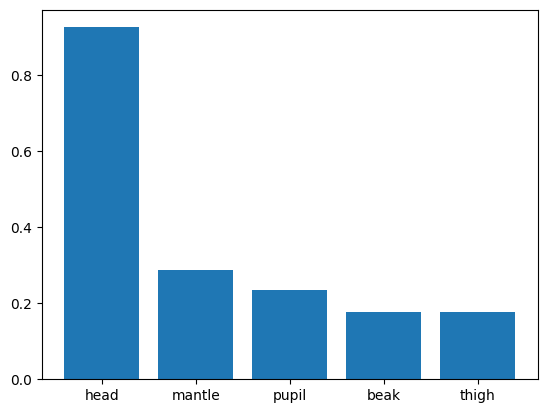

In [150]:
plt.bar(c.values(), c.keys())
# plt.xticks(indexes + width * 0.5, labels)
plt.show()

## Most  Unambigious images

In [88]:
results["units"].sort_values(by=["uqs"])[["input.INPUT:image_right", "uqs", "unit_annotation_score"]].head()['input.INPUT:image_right'][0]

'/pilot/GilaWoodpecker/gila_woodpecker_batch_2_6.png'

In [133]:
a = results["units"].sort_values(by=["uqs"])[["input.INPUT:image_right", "unit_annotation_score","output.OUTPUT:result"]]['unit_annotation_score'][0]

('mantle', 0.5747041547737092)

In [143]:
w = dict((y, x) for x, y in a.most_common(5))

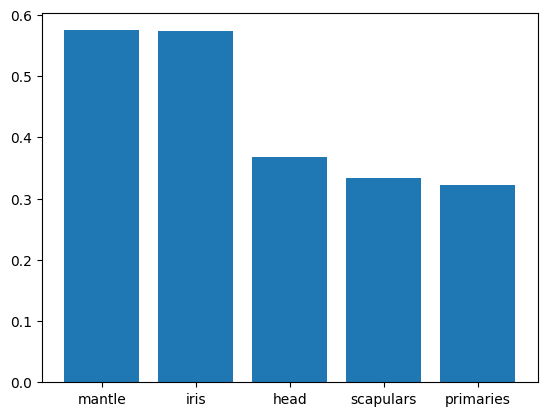

In [145]:
plt.bar(w.values(), w.keys())
plt.show()